1387
Chao Zhang 2352
domain specific entity linking 42027
118
269
9
{2352: 4, 10538: 2, 2797: 4, 3331: 1, 10918: 2, 9174: 1, 3104: 1, 9175: 1, 5377: 1, 15018: 1, 1383: 4, 945: 1, 10916: 2, 3467: 2, 10914: 1, 10915: 1, 7006: 1, 23067: 1, 10917: 1, 3161: 2, 406: 1, 3176: 1, 3648: 1, 5058: 1, 12387: 1, 12388: 1, 10816: 1, 1386: 1, 1872: 1, 10680: 1, 5153: 1, 14451: 1, 1611: 1, 1384: 1, 21872: 1, 2078: 1, 16302: 1}
{32593: 2, 26212: 1, 52052: 1, 24359: 2, 24501: 2, 27982: 1, 30412: 1, 35911: 1, 33534: 1, 52800: 1, 44745: 1, 41704: 1, 37387: 1, 32573: 1, 37781: 1, 55385: 1, 28228: 1, 55386: 1, 55834: 1, 30299: 1, 55835: 1, 24965: 1, 28311: 1, 24354: 1, 26809: 1, 32090: 1, 27144: 1, 24406: 1, 36166: 1, 36167: 1, 36168: 1, 36169: 1, 36170: 1, 36171: 1, 32514: 1, 26775: 1, 39457: 1, 32863: 2, 39458: 2, 28783: 1, 42134: 1, 42135: 1, 42888: 1, 42889: 1, 42890: 1, 53144: 1, 53145: 1, 33899: 1, 28497: 1}
{11: 2, 3: 2, 5: 1, 14: 3, 10: 1, 0: 2, 8: 1}
[34307, 49659, 27655, 25097, 37388, 37389, 37390

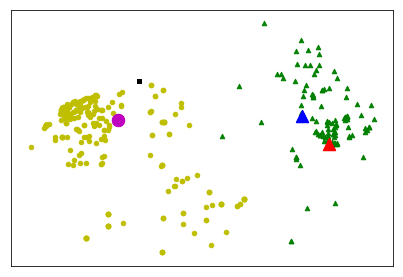

In [14]:
import sys
sys.path.append('..')
import pickle as pkl
from utils import Indexer
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
init_from='/home1/wyf/Projects/dynamic_network_embedding/save/mag/h_128_b_64_l_0.005_d_0.98_ds_100.0_k_1.0_random_50_n_5_ns_1_witht_init'
paper_choosed_small = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/paper_choosed_small.txt'
paper_choosed_test = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/event_testdata.txt'
indexer_root = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/indexer.pkl'
event_sorted_root = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/event_sorted.txt'
acase_indexer_root = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/a_indexer.pkl'
kcase_indexer_root = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/k_indexer.pkl'
avcase_indexer_root = '/home1/wyf/Projects/dynamic_network_embedding/data/mag/processed/v_indexer.pkl'
with open(indexer_root, 'rb') as indexer:
    indexer_data = pkl.load(indexer)
print(indexer_data.get_index('author','Jiawei Han'))
author_root = indexer_data.get_index('author','Jiawei Han')
kkk = 42027
for (key, ids) in indexer_data.mapping['author'].items():
    if ids == 2352:
        print(key, ids)
for (key, ids) in indexer_data.mapping['keyword'].items():
    if ids == kkk:
        print(key, ids)
a_list = set()
k_list = set()
v_list = set()
with open(event_sorted_root, 'r') as event_data:
    for line in event_data:
        value = line.strip().split('\t')
        authors = value[3].split(';')
        authors_int = [int(author) for author in authors]
        if author_root not in authors_int:
            continue
        else:
            venue_int = int(value[1])
            keywords = value[4].split(';')
            keywords_int = [int(keyword) for keyword in keywords]
            a_list.update(authors_int)
            k_list.update(keywords_int)
            v_list.add(venue_int)
print(len(a_list))
print(len(k_list))
print(len(v_list))

a_dict = {}
k_dict = {}
v_dict = {}
with open(paper_choosed_test, 'r') as event_test:
    for line in event_test:
        value = line.strip().split('\t')
        authors = value[3].split(';')
        authors_int = [int(author) for author in authors]
        if author_root not in authors_int:
            continue
        else:
            venue_int = int(value[1])
            keywords = value[4].split(';')
            keywords_int = [int(keyword) for keyword in keywords]
            v_dict[venue_int] = v_dict.get(venue_int, 0)+1
            for ar in authors_int:
                if ar != author_root:
                    a_dict[ar] = a_dict.get(ar, 0)+1
            for kw in keywords_int:
                k_dict[kw] = k_dict.get(kw, 0)+1
print(a_dict)
print(k_dict)
print(v_dict)
print([x for x in k_list if x not in k_dict.keys()])
                
# with open(acase_indexer_root, 'wb') as indexer:
#     pkl.dump(a_list, indexer)
# with open(kcase_indexer_root, 'wb') as indexer:
#     pkl.dump(k_list, indexer)
# with open(vcase_indexer_root, 'wb') as indexer:
#     pkl.dump(v_list, indexer)

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_norm = np.load(init_from+'_embedding_trans1.npy')
X_norm_test = np.load(init_from+'_embedding_trans_test1.npy')
# plt.figure(figsize=(9,2.7))
# ax1 = plt.subplot(1,2,1)
# figure, ax = plt.subplots()
figure = plt.figure()
# for i in range(21):
#     if i in v_list:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=20, c='k', marker='s')
# for i in range(21, 24317):
#     if i == 1387:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=150, c='r', marker='^')
#     elif i == 2352:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=150, c='b', marker='^')
#     elif i in a_list:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=20, c='g', marker='^')
# for i in range(24317, 57163):
#     if i == kkk:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=150, c='m', marker='o')
#     elif i in k_list:
#         plt.scatter(X_norm[i,0], X_norm[i,1], s=20, c='y', marker='o')
        
# plt.scatter(X_norm[1387,0], X_norm[1387,1], s=150, c='r', marker='^')
# plt.scatter(X_norm[2352,0], X_norm[2352,1], s=150, c='b', marker='^')
# plt.scatter(X_norm[kkk,0], X_norm[kkk,1], s=150, c='m', marker='o')
# plt.xticks([])
# plt.yticks([])
# ax2 = plt.subplot(1,2,2)
for i in range(21):
    if i in v_list:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=20, c='k', marker='s')
for i in range(21, 24317):
    if i == 1387:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=150, c='r', marker='^')
    elif i == 2352:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=150, c='b', marker='^')
    elif i in a_list:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=20, c='g', marker='^')
for i in range(24317, 57163):
    if i == kkk:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=150, c='m', marker='o')
    if i in k_list:
        plt.scatter(X_norm_test[i,0], X_norm_test[i,1], s=20, c='y', marker='o')

plt.scatter(X_norm_test[1387,0], X_norm_test[1387,1], s=150, c='r', marker='^')
plt.scatter(X_norm_test[2352,0], X_norm_test[2352,1], s=150, c='b', marker='^')
plt.scatter(X_norm_test[kkk,0], X_norm_test[kkk,1], s=150, c='m', marker='o')
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(top=0.98, right=0.975, left=0.09, bottom=0.09)
plt.savefig("fig4(b).pdf")
plt.show()